# What we'll study in data mining

A famous problem is to write a program that can "read" the number that is contained in an image.

![MNIST digits](https://www.researchgate.net/profile/Pablo-Zegers/publication/306088728/figure/fig2/AS:394612758859777@1471094421263/A-collage-of-8-8-randomly-picked-images-of-handwritten-digits-from-the-MNIST-training.png)

It is hard to manually write a program to do this.
In this class, we will study algorithms that learn how to perform this task automatically from data.

## Load the MNIST data

In [1]:
# load MNIST dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

# create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=50000, test_size=10000, random_state=0
)

# print debug info
print('X_train.shape=', X_train.shape)
print('y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape)
print('y_test.shape=', y_test.shape)

X_train.shape= (50000, 784)
y_train.shape= (50000,)
X_test.shape= (10000, 784)
y_test.shape= (10000,)


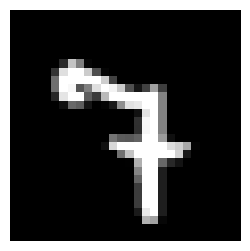

In [28]:
# visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

image = X_train.iloc[0].to_numpy().reshape([28,28])
fig = plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

## Training a model

Now that we have some data, we can train a model on the data.
The popular Python library scikit-learn has [lots of models for us to choose from](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [35]:
import time
train_start = time.time()

# train model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
#clf.fit(X_train, y_train)

#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier()
#clf.fit(X_train, y_train)

#from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(hidden_layer_sizes=[10])
#clf.fit(X_train, y_train)

# print training time
train_stop = time.time()
print(f'training time: {train_stop-train_start:0.2f} sec')

# evaluate model
score = clf.score(X_test, y_test)
print("score: %.4f" % score)

training time: 2525.51 sec
score: 0.9085


/home/user/proj/cmc-csci145-math166/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Takeaways:

1. The programming is EASY
1. Selecting which algorithm and which "hyperparameters" is HARD

You need to understand a LOT of math to understsand how select the best algorithm/hyperparameters for a particular problem